CNN-Image classify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np
import cv2
import os
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
from scipy.signal import butter, filtfilt
#from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# def butter_bandpass_filter(data, lowcut, highcut, fs, order):
#     nyq = 0.5 * fs
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='band')
#     y = filtfilt(b, a, data)
#     return y

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
Xs = np.load("/content/drive/MyDrive/MSU_Dataset/all_xs.npy")
ys = np.load("/content/drive/MyDrive/MSU_Dataset/all_ys.npy")
ys[: 100]

array([1, 3, 1, 3, 1, 3, 0, 2, 0, 2, 1, 3, 1, 3, 1, 3, 0, 2, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 0, 2, 1, 3, 0, 2, 0, 2, 0, 2, 0, 2, 1, 3, 0, 2,
       0, 2, 1, 3, 0, 2, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 0, 2, 1, 3, 0, 2,
       1, 3, 0, 2, 0, 2, 0, 2, 1, 3, 0, 2, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2,
       0, 2, 1, 3, 1, 3, 0, 2, 1, 3, 1, 3])

In [ ]:
# lowcut = 8
# highcut = 30
# order = 5
# fs = 100
# Xs2 = butter_bandpass_filter(Xs, lowcut, highcut, fs, order )

list

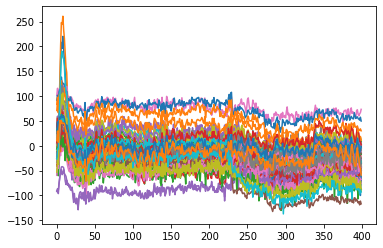

In [ ]:
type(plt.plot(Xs[5]))

In [ ]:
Xs.shape,ys.shape

((41600, 400, 62), (41600,))

In [ ]:
from tensorflow.keras.utils import to_categorical
#Xs = to_categorical(Xs)
Ys = to_categorical(ys)

In [ ]:
Xs2 = np.reshape(Xs, (Xs.shape[0], Xs.shape[1], Xs.shape[2], 1))
Xs2.shape

(41600, 400, 62, 1)

In [ ]:
Ys.shape

(41600, 4)

In [ ]:
Ys[:10]

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

random_state = 42
X_train, X_test, y_train, y_test = train_test_split(Xs2, Ys, test_size=0.1, random_state=random_state,shuffle=True)

In [ ]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
#from pyimagesearch.smallervggnet import SmallerVGGNet
import tensorflow
import matplotlib.pyplot as plt
from imutils import paths
import tensorflow 
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
#from keras.optimizers import adam

video = Input(shape=(400,62,1))
cnn_base = VGG16(input_shape=(400,62,1),weights="imagenet",include_top=False)
cnn_out = GlobalAveragePooling2D()(cnn_base.output)
cnn = Model(input=cnn_base.input, output=cnn_out)
cnn.trainable = False
encoded_frames = TimeDistributed(cnn)(video)
encoded_sequence = LSTM(256)(encoded_frames)
hidden_layer = Dense(output_dim=1024, activation="elu")(encoded_sequence)
outputs = Dense(output_dim=4, activation="sigmoid")(hidden_layer)
model = Model([video], outputs)
optimizer = Nadam(lr=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-08,
                  schedule_decay=0.004)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"]) 

ValueError: ignored

In [ ]:
EPOCHS = 30
INIT_LR = 1e-4
BS = 128
IMAGE_DIMS = (400, 62, 1)
# disable eager execution
tf.compat.v1.disable_eager_execution()

In [ ]:
model = SmallerVGGNet.build(
	width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
	depth=IMAGE_DIMS[2], classes=4,
	finalAct="sigmoid")
# initialize the optimizer (SGD is sufficient)
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)

ValueError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 62, 32)       320       
                                                                 
 activation (Activation)     (None, 400, 62, 32)       0         
                                                                 
 batch_normalization (BatchN  (None, 400, 62, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 133, 20, 32)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 133, 20, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 133, 20, 64)       1

In [ ]:
# model save path
model_save_path = "/content/drive/MyDrive/machima/VGG16_elu_binary_sigmoid_30epochs_brainwave_save_v1.h5" 
# callback
#callbacks = [ tensorflow.keras.callbacks.ModelCheckpoint(model_save_path,monitor='val_loss', verbose=1, save_best_only=True,mode='min'), ]
ModelCheckpoint = [ tensorflow.keras.callbacks.ModelCheckpoint(model_save_path,monitor='val_accuracy', verbose=1, save_best_only=True,mode='max'), ]
# Early stop
Early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

my_callbacks = [ModelCheckpoint, Early]

In [ ]:
from keras.preprocessing import image
import numpy as np

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the network
print("[INFO] training network...")
# Train Model with datgenerator
#gen_trian = datagen.flow(X_train, y_train, batch_size=128)
# hist =  model.fit_generator(gen_trian,epochs=20, 
#                             validation_data=(X_test, y_test),
#                             steps_per_epoch=X_train.shape[0]/32, 
#                             #steps_per_epoch=txt_batch_size, 
#                             callbacks=my_callbacks, 
#                             verbose=1)
#                             #class_weight = class_weights )
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test), batch_size=128 , callbacks=my_callbacks)

[INFO] training network...
Train on 37440 samples, validate on 4160 samples
Epoch 1/30
37440/37440 [==============================] - ETA: 0s - loss: 0.7370 - accuracy: 0.6347

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: val_accuracy improved from -inf to 0.70204, saving model to /content/drive/MyDrive/machima/VGG16_elu_binary_sigmoid_30epochs_brainwave_save_v1.h5
37440/37440 [==============================] - 50s 1ms/sample - loss: 0.7370 - accuracy: 0.6347 - val_loss: 0.5918 - val_accuracy: 0.7020
Epoch 2/30
37440/37440 [==============================] - ETA: 0s - loss: 0.5790 - accuracy: 0.7323
Epoch 2: val_accuracy improved from 0.70204 to 0.76046, saving model to /content/drive/MyDrive/machima/VGG16_elu_binary_sigmoid_30epochs_brainwave_save_v1.h5
37440/37440 [==============================] - 38s 1ms/sample - loss: 0.5790 - accuracy: 0.7323 - val_loss: 0.5213 - val_accuracy: 0.7605
Epoch 3/30
37440/37440 [==============================] - ETA: 0s - loss: 0.5140 - accuracy: 0.7722
Epoch 3: val_accuracy improved from 0.76046 to 0.77722, saving model to /content/drive/MyDrive/machima/VGG16_elu_binary_sigmoid_30epochs_brainwave_save_v1.h5
37440/37440 [==============================] - 38s 1



---



---


This for try out your image

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/machima/VGG16_binary_sigmoid_30epochs_brainwave_save_v1.h5')

In [ ]:
!wget https://storage.googleapis.com/stateless-aiat-or-th/x_test_final.npy

--2022-04-02 14:35:09--  https://storage.googleapis.com/stateless-aiat-or-th/x_test_final.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793600128 (757M) [application/octet-stream]
Saving to: ‘x_test_final.npy’

x_test_final.npy    100%[===================>] 756.84M   160MB/s    in 5.4s    

2022-04-02 14:35:14 (139 MB/s) - ‘x_test_final.npy’ saved [793600128/793600128]



In [ ]:
project_id = 'poc01-320504'
!gcloud config set project {project_id}

# !gsutil cp -v gs://eeg-machima/session1.zip .
# !gsutil cp -v gs://eeg-machima/session2.zip .
!gsutil cp -v gs://eeg-machima/x_test.npy .

Updated property [core/project].
Copying gs://eeg-machima/x_test.npy...
Created: file://./x_test.npy

Operation completed over 1 objects/756.8 MiB.                                    


In [ ]:
# import _pickle as cPickle

# filename = 'finalized_model.sav'

# cPickle.dump(rf, open(filename, 'wb'))

# result = loaded_model.predict(fvte_test.data)

# loaded_model = cPickle.load(open(filename, 'rb'))

In [ ]:
x_test = np.load("/content/x_test.npy")
x_test.shape

(400, 62, 4000)

In [ ]:
x_test_final = np.load("/content/x_test_final.npy")
x_test_final.shape

(400, 62, 4000)

In [ ]:
kaggle_test = np.concatenate([x_test, x_test_final], axis=0)
kaggle_test.shape

(800, 62, 4000)

In [ ]:
kaggle_sub = []
for i in range(800):
    kaggle_sub.append(kaggle_test[i].T)
kaggle_sub = np.array(kaggle_sub)

In [ ]:
index = np.linspace(0, 4000, 800, endpoint=False).astype(dtype=np.int32)
len(index)

800

In [ ]:
index = np.linspace(0, 4000, 400, endpoint=False).astype(dtype=np.int32)

kaggle_sub400 = kaggle_sub[:, index, :]
kaggle_sub400.shape

(800, 400, 62)

In [ ]:
kaggle_sub400 = kaggle_sub400.reshape( (kaggle_sub400.shape[0], kaggle_sub400.shape[1], kaggle_sub400.shape[2], 1 ) )
kaggle_sub400.shape

(800, 400, 62, 1)

In [ ]:
kaggle_sub400[0][0][0]

array([-58.])

In [ ]:
pred = model.predict(kaggle_sub400)

In [ ]:
pred.shape

(800, 4)

In [ ]:
pred

array([[9.4052351e-01, 4.0233817e-02, 9.8847291e-03, 9.3579050e-03],
       [8.4235674e-01, 6.9853768e-02, 6.6765413e-02, 2.1024022e-02],
       [2.3851113e-03, 7.3401117e-01, 2.0143924e-02, 2.4345979e-01],
       ...,
       [2.6109564e-01, 1.0127561e-01, 6.0458684e-01, 3.3041965e-02],
       [1.0710411e-02, 9.8871928e-01, 5.2797940e-04, 4.2200838e-05],
       [9.9999940e-01, 3.1810609e-07, 3.1075007e-08, 1.6604572e-07]],
      dtype=float32)

In [ ]:
ymax = np.argmax(pred, axis=1)
ymax

array([0, 0, 1, 0, 3, 3, 0, 2, 3, 1, 1, 0, 3, 3, 1, 2, 3, 3, 2, 1, 0, 0,
       3, 1, 2, 0, 2, 3, 0, 2, 2, 0, 0, 2, 2, 2, 1, 0, 1, 1, 0, 3, 0, 2,
       2, 1, 0, 2, 1, 3, 3, 3, 0, 2, 2, 1, 0, 3, 0, 2, 2, 0, 0, 1, 1, 0,
       3, 1, 1, 1, 3, 2, 3, 0, 2, 0, 1, 2, 1, 0, 2, 2, 1, 3, 2, 0, 2, 0,
       3, 3, 0, 0, 0, 3, 3, 2, 2, 3, 3, 2, 1, 3, 0, 1, 2, 3, 2, 1, 1, 3,
       0, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 3, 0, 2, 2, 3, 3, 1, 2, 2, 0, 3,
       1, 2, 2, 3, 2, 0, 2, 1, 1, 1, 3, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2, 0,
       1, 0, 1, 0, 3, 0, 0, 2, 3, 2, 2, 0, 2, 2, 2, 0, 3, 1, 2, 0, 3, 3,
       3, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 3, 1,
       0, 0, 2, 2, 3, 2, 2, 3, 1, 3, 3, 2, 0, 2, 0, 2, 0, 3, 0, 2, 3, 2,
       0, 0, 1, 1, 1, 0, 2, 2, 3, 3, 1, 3, 3, 3, 0, 3, 3, 2, 1, 0, 2, 2,
       2, 3, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 3, 3, 1, 1, 3, 2,
       2, 1, 3, 2, 1, 3, 0, 3, 3, 2, 0, 0, 1, 1, 0, 3, 3, 0, 1, 2, 0, 2,
       1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 3, 3, 2, 3, 0,

In [ ]:
ids = []
predicts = []
for i in range(800):
    
    if i < 400:
        predicts.append(ymax[i])
        ids.append(str(i+1))
    else:
        predicts.append(ymax[i])
        ids.append("f"+str(i-400+1))

len(ids),len(predicts)

(800, 800)

In [ ]:
import pandas as pd

df = pd.DataFrame(data={'sample_id':ids,'prediction': predicts})
df

,sample_id,prediction
0,1,0
1,2,0
2,3,1
3,4,0
4,5,3
...,...,...
795,f396,0
796,f397,3
797,f398,2
798,f399,1


In [ ]:
df.to_csv('VGG16_elu_sigmoid_binary_30epochs_weak.csv',index=False)